# Create path plots in SIMBA

In this notebook, we will create a bunch of different styled path plots representing visualizations for where the animal(s) spends its time.

In [3]:
from simba.plotting.path_plotter_mp import PathPlotterMulticore
from matplotlib import pyplot as plt
import cv2

Path plots accepts a wide range of specifications, described below:

In [6]:
#Path to SimBA project config file.
CONFIG_PATH = '/Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/project_config.ini'
#List of data files containing pose-estimation data. In this example, we will create visualizations for just one file, but feel free to add the paths to more files.
DATA_PATHS = ['/Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/csv/machine_results/Trial    10.csv']
#The background color of the path plot. In this first example, we will use white, but we will come back to this with fancier examples.
BG_COLOR = (255, 255, 255)
#The number of the most recent moves to plot in the path. In this first example we will plot the entire path in the video, but we will come back to this too.
MAX_LINES = 'entire video'
# A dictionary containing the body-parts we want to use when visualizing the paths and the path color.
ANIMAL_ATTR = {0: {'bp': 'Ear_right_1', 'color': (255, 0, 0)}, 1: {'bp': 'Ear_right_2', 'color': (0, 0, 255)}}
# The width of the path plot image we want to create. If `As input`, then the image will be as wide as the original video.
WIDTH = 'As input'
# The height of the path plot image we want to create. If `As input`, then the image will be as high as the original video.
HEIGHT = 'As input'
# The width of the line(s) representing the animal path.
LINE_WIDTH = 2
# If working with paths from several animals, it can be helpful to print the name of the animal next to the current location of the animal. If you want to do this, set this to True. We will leave this off.
PRINT_ANIMAL_NAMES = False
# If printing the animal names, this will be the size of the font of the animal names.
FONT_SIZE = 0.9
# If printing the animal names, this will be the font thickness of the animal names.
FONT_THICKNESS = 2
# When generating path videos and frames, the current location of the animal is shown as a circle. This number controls the size of this circle
CIRCLE_SIZE = 2
# If you want to create a png image for every frame in your input video, set this to True. We will leave this as False.
FRAME_SETTING = False
# If you want to create a video representing the paths of your animals, set this to True. We will leave this as False.
VIDEO_SETTING = False
# If you want to show the locations of your classified behaviors on the path plot, use this variable. We will come back to this - for now, we leave this as None.
CLF_ATTR = None
# If you want to create a path plot representing a defined start and end time of your vidos, use slicing. We will come back to this - for now, we leave this as None.
SLICING = None
# We use cores to tell how many of your CPU cores to use when creating the plots. In this notebook, we will only create one image per input video, so it wont have much affect. To use all your cores, set this value to -1
CORES = -1

In [7]:
# WE PLACE THE STYLE SELECTIONS ABOVE IN A DICTIONARY THAT THE PATH PLOTTER ACCEPTS.
STYLE_ATTR = {'width': WIDTH,
              'height': HEIGHT,
              'line width': LINE_WIDTH,
              'font size': FONT_SIZE,
              'font thickness': FONT_THICKNESS,
              'circle size': CIRCLE_SIZE,
              'bg color': BG_COLOR,
              'max lines': MAX_LINES}


# WE DEFINE AN INSTANCE OF THE PATH PLOTTER AND RUN IT
path_plotter = PathPlotterMulticore(config_path=CONFIG_PATH,
                                    frame_setting=FRAME_SETTING,
                                    video_setting=VIDEO_SETTING,
                                    last_frame=True,
                                    clf_attr=CLF_ATTR,
                                    input_style_attr=STYLE_ATTR,
                                    animal_attr=ANIMAL_ATTR,
                                    files_found=DATA_PATHS,
                                    cores=CORES,
                                    slicing = SLICING,
                                    print_animal_names=PRINT_ANIMAL_NAMES)

path_plotter.run()

/Users/simon/opt/anaconda3/envs/simba/lib/python3.6/_collections_abc.py:666: MatplotlibDeprecationWarning:

The global colormaps dictionary is no longer considered public API.



Processing 1 videos...
SIMBA COMPLETE: Path plot saved at /Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/frames/output/path_plots/Trial    10_final_frame.png (elapsed time: 0.0422s) 	complete
SIMBA COMPLETE: Path plot visualizations for 1 videos created in /Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/frames/output/path_plots directory (elapsed time: 0.3679s) 	complete


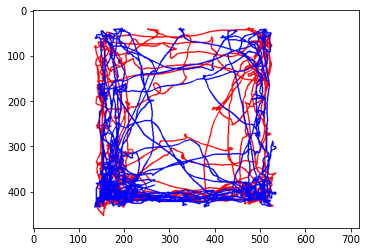

In [8]:
# ...AND VIEW THE IMAGE FROM THE FILE ON THE DISK
image = cv2.imread("/Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/frames/output/path_plots/Trial    10_final_frame.png")
plt.imshow(image)
plt.show()

In [9]:
# We may want to change the background, to represent the actual arena with some opacity decrease
STYLE_ATTR['bg color'] = {'type': 'static', 'opacity': 50, 'frame_index': 1}
path_plotter = PathPlotterMulticore(config_path=CONFIG_PATH,
                                    frame_setting=FRAME_SETTING,
                                    video_setting=VIDEO_SETTING,
                                    last_frame=True,
                                    clf_attr=CLF_ATTR,
                                    input_style_attr=STYLE_ATTR,
                                    animal_attr=ANIMAL_ATTR,
                                    files_found=DATA_PATHS,
                                    cores=CORES,
                                    slicing = SLICING,
                                    print_animal_names=PRINT_ANIMAL_NAMES)

path_plotter.run()


Processing 1 videos...
SIMBA COMPLETE: Path plot saved at /Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/frames/output/path_plots/Trial    10_final_frame.png (elapsed time: 0.0416s) 	complete
SIMBA COMPLETE: Path plot visualizations for 1 videos created in /Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/frames/output/path_plots directory (elapsed time: 0.3247s) 	complete


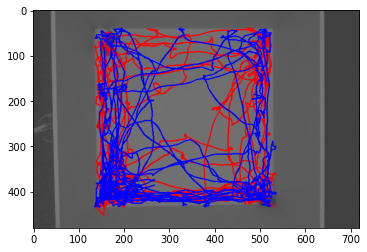

In [11]:
#... AND VIEW THE NEW IMAGE FROM THE FILE ON THE DISK
image = cv2.imread("/Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/frames/output/path_plots/Trial    10_final_frame.png")
plt.imshow(image)
plt.show()

In [12]:
# We may to only display the path tracks from the first 2 minutes of the video.
SLICING = {'start_time': '00:00:00', 'end_time': '00:02:00'}
path_plotter = PathPlotterMulticore(config_path=CONFIG_PATH,
                                    frame_setting=FRAME_SETTING,
                                    video_setting=VIDEO_SETTING,
                                    last_frame=True,
                                    clf_attr=CLF_ATTR,
                                    input_style_attr=STYLE_ATTR,
                                    animal_attr=ANIMAL_ATTR,
                                    files_found=DATA_PATHS,
                                    cores=CORES,
                                    slicing = SLICING,
                                    print_animal_names=PRINT_ANIMAL_NAMES)

path_plotter.run()

Processing 1 videos...
SIMBA COMPLETE: Path plot saved at /Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/frames/output/path_plots/Trial    10_final_frame.png (elapsed time: 0.0223s) 	complete
SIMBA COMPLETE: Path plot visualizations for 1 videos created in /Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/frames/output/path_plots directory (elapsed time: 0.294s) 	complete


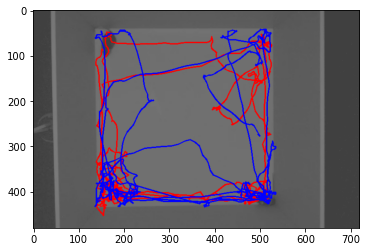

In [14]:
#... AND VIEW THE NEW IMAGE FROM THE FILE ON THE DISK
image = cv2.imread("/Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/frames/output/path_plots/Trial    10_final_frame.png")
plt.imshow(image)
plt.show()

In [15]:
# We may want to display larger circles showing the location of the classified behaviors.
CLF_ATTR = {'Nose to Nose': {'color': (155, 1, 10), 'size': 30}, 'Nose to Tailbase': {'color': (155, 90, 10), 'size': 30}}
path_plotter = PathPlotterMulticore(config_path=CONFIG_PATH,
                                    frame_setting=FRAME_SETTING,
                                    video_setting=VIDEO_SETTING,
                                    last_frame=True,
                                    clf_attr=CLF_ATTR,
                                    input_style_attr=STYLE_ATTR,
                                    animal_attr=ANIMAL_ATTR,
                                    files_found=DATA_PATHS,
                                    cores=CORES,
                                    slicing = SLICING,
                                    print_animal_names=PRINT_ANIMAL_NAMES)

path_plotter.run()

Processing 1 videos...
SIMBA COMPLETE: Path plot saved at /Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/frames/output/path_plots/Trial    10_final_frame.png (elapsed time: 0.0276s) 	complete
SIMBA COMPLETE: Path plot visualizations for 1 videos created in /Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/frames/output/path_plots directory (elapsed time: 0.329s) 	complete


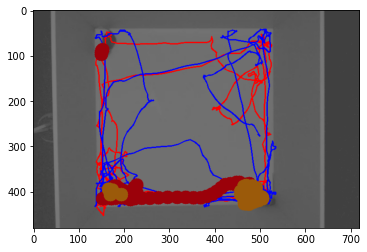

In [16]:
# ... AND VIEW THE NEW IMAGE FROM THE FILE ON THE DISK
image = cv2.imread("/Users/simon/Desktop/envs/simba/troubleshooting/beepboop174/project_folder/frames/output/path_plots/Trial    10_final_frame.png")
plt.imshow(image)
plt.show()